In [110]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

# Getting the Data

In [111]:
X, y = make_classification(n_samples=500, n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1, random_state=14)

In [112]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


# Splitting into Trainset and Testset

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=0)

In [114]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(400, 2) (400,)
(100, 2) (100,)


# Visualising the data

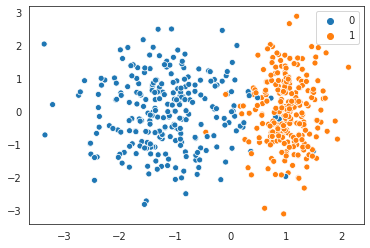

In [115]:
sns.set_style('white')
sns.scatterplot(X[:,0],X[:,1],hue=y)

In [116]:
# Defining the sigmoid activation 
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [117]:
# Logistic regression uses Cross Entropy loss i.e -ylog(1-y_pred)-(1-y)log(1-y_pred)
def cross_entropy_loss(y, y_pred):
  loss = 0
  loss = -1*y*np.log(y_pred) - (1-y)*np.log(1-y_pred)
  return loss.mean()

# Training



In [118]:
def train(x, y, epochs = 1000, lr=0.01):
  w = np.random.randn(1,x.shape[1])
  b = 0
  m = len(x)
  loss = 0
  loss_arr = []
  y = y[:, np.newaxis]
  for i in range(epochs):
    # Forward pass to get the y_pred = 1/(1+exp(w1*x1+w2*x2+b))
    y_pred = sigmoid(np.dot(X_train,w.T)+b)

    # Calculating loss with our prediction
    loss = cross_entropy_loss(y, y_pred)
    loss_arr.append(loss)

    # Updating weights and bias with Gradient Descent
    w = w - (1/m) * lr * np.dot((y_pred - y).T, x)
    b = b - (1/m) * lr * np.sum((y_pred - y))

    if i % 10 == 0:
      print("Loss at %d step is %0.2f"% (i, loss))

  # Plotting the loss curve
  plt.plot(np.arange(epochs), loss_arr)
  plt.xlabel('epochs')
  plt.ylabel('Loss')
  plt.show()

  return w, b

In [ ]:
# Training logistic regression over training data and getting optimal weights & bias
w_opt, b_opt = train(X_train, y_train)

In [120]:
def accuracy(X, y, w_opt, b_opt):
  y_pred = sigmoid(np.dot(X,w_opt.T)+b_opt)
  # rounding the values to nearest number
  y_pred = np.around(y_pred)
  y = y[:,np.newaxis]  # (m , 1)
  
  return np.mean(y_pred == y)  # Percentage of matching 0s and 1s in y & y_pred

In [121]:
acc = accuracy(X_test, y_test, w_opt, b_opt)
print('Accuracy is %0.2f'% acc)

(100, 1)
(100, 1)
Accuracy is 0.98
